In [174]:
import time
import warnings
from datetime import datetime as dt
from re import M
import ast

import git
import numpy as np
import pandas as pd
from scipy.stats import truncnorm
import scipy.stats as stats

import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
repo = git.Repo(".", search_parent_directories=True).git.rev_parse(
    "--show-toplevel"
)
df = pd.read_csv(f"{repo}/data/cleaning/test_1652280840.csv") 
df_stops = pd.read_excel(
    f"{repo}/data/other/MoDstops+Preismodell.xlsx", sheet_name="MoDstops"
)

df.head(2)

,id,user_id,distance,number_of_passenger,price_operations,price_offer,price_payed,free_ride,payment_type,pickup_address,dropoff_address,state,created_from_offer,created_at,scheduled_to,dispatched_at,pickup_arrival_time,arriving_push,vehicle_arrived_at,earliest_pickup_expectation,pickup_first_eta,pickup_eta,pickup_at,dropoff_first_eta,dropoff_eta,dropoff_at,updated_at,arrival_deviation,waiting_time,boarding_time,ride_time,trip_time,shortest_ridetime,delay,longer_route_factor,arrival_indicator,rating,rating_puenktlichkeit,rating_sauberkeit,rating_fahrer,rating_find_modstop,rating_other_comments,cancellation_reason,cancellation_comment,sheet_name,file_name,bahn_card_number,year_card_type,year_card_number,canceled_at,rating_question_one,rating_question_two,index
0,5727475e-8224-4302-9228-c92b9d4a5220,f8ff0526-887a-4e48-ad96-977e12fd70c1,5483.0,1.0,4.65,4.65,0.0,False,STANDARD,11009,6004,completed,NaN,2021-06-30 23:12:47,2021-07-01 07:30:00,2021-07-01 07:22:00,637.0,2021-07-01 07:29:37,2021-07-01 07:32:37,2021-07-01 07:25:00,2021-07-01 07:33:55,2021-07-01 07:34:07,2021-07-01 07:33:08,2021-07-01 07:44:27,2021-07-01 07:44:39,2021-07-01 07:44:44,2021-11-03 16:00:44,0.0,457.0,31.0,696.0,1153.0,658.0,495.0,1.06,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,b'Rides_2021-07.xlsx',NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18fec0a6-b7ba-442b-8472-04bdb6ba1b86,51e1a1a8-995c-488c-84ce-3789e46f0417,3575.0,1.0,0.00,2.77,0.0,False,BAHN_CARD,2007,3025,canceled,NaN,2021-06-30 22:51:53,2021-07-01 08:50:00,2021-07-01 08:42:00,NaN,NaN,NaN,2021-07-01 08:45:00,NaN,NaN,NaN,NaN,NaN,NaN,2021-07-01 08:16:03,NaN,NaN,NaN,NaN,NaN,429.0,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,b'Rides_2021-07.xlsx',NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_stops = pd.read_excel(
    f"{repo}/data/other/MoDstops+Preismodell.xlsx", sheet_name="MoDstops"
)
df_stops.head(2)

,MoDStop Id,MoDStop Name,MoDStop Lat,MoDStop Long,MoDStop Adresse
0,1001,Mandelgasse,49.351780,8.129000,"Seilerbahn 1, 67433 Neustadt"
1,1002,Hauptfeuerwache,49.353733,8.131552,"Lindenstraße 11, 67433 Neustadt"


In [5]:
df_routes = pd.read_excel(
    f"{repo}/data/other/MoDstops+Preismodell.xlsx", sheet_name="Liste 2022"
)
df_routes.head(2)


,Start #,Start Name,Ende #,Ende Name,Route [m],Luftlinie [m],VRN-eTarif\nohne Bahncard,VRN-eTarif\nmit BahnCard,Qualitätszuschlag,MoD-Fahrpreis \nohne BahnCard,MoD-Fahrpreis\n mit Bahncard,0.12680550240634963,0.07159177456207169,0.18042226487523982,0.5159630940478845,0.2894135567402895,0.72936660268714,price_mod,price_mod_2pers,price_mod_3pers,price_mod_4pers,price_bahncard,price_bahncard_2pers,price_bahncard_3pers,price_bahncard_4pers,price_vrn_surcharge,price_vrn_surcharge_2pers,price_vrn_surcharge_3pers,price_vrn_surcharge_4pers
0,1001,Mandelgasse,1002,Hauptfeuerwache,366,285,1.65,1.24,0.9,2.55,2.14,0.160784,NaN,NaN,0.647059,NaN,NaN,2.55,4.275,6.0,7.725,2.14,3.865,5.18,6.7,0.9,2.625,3.94,5.46
1,1001,Mandelgasse,1003,Kindergarten St. Marien,994,586,1.65,1.24,0.9,2.55,2.14,0.160784,NaN,NaN,0.647059,NaN,NaN,2.55,4.275,6.0,7.725,2.14,3.865,5.18,6.7,0.9,2.625,3.94,5.46


In [6]:
# ## Old but gold 


# ##### TODO: Check in the end if too many rides, which are too short or are not likely enough 
# # Check that no same start and stop address 


# def generateRoute(oldRides, newRides, ridestops, routes):
#     # based on analysis of rides we distinguish between workdays (Monday till Friday noon) and weekend (Friday noon till Sunday)
#     newRideStops = pd.DataFrame(newRides[['scheduled_to', 'pickup_address', 'dropoff_address']], columns=['scheduled_to', 'pickup_address', 'dropoff_address'])
#     newRideStops['day'] = newRideStops['scheduled_to'].apply(lambda x: dt.weekday(x))
#     newRideStops['hour'] = newRideStops['scheduled_to'].apply(lambda x: x.hour)
#     newRideStops['workday'] = np.where(
#         (
#             newRideStops['day'].isin([0,1,2,3,4]) # 0 = Monday, 6 = Sunday
#             & ~(
#                     (newRideStops['day'] == 4) 
#                     & (newRideStops['hour'] > 13)
#             )
#         ),
#         True,
#         False
#     )

#     oldRidestops = pd.DataFrame(oldRides[['state', 'scheduled_to', 'pickup_address', 'dropoff_address']], columns=['state', 'scheduled_to', 'pickup_address', 'dropoff_address'])
#     oldRidestops['scheduled_to'] = pd.to_datetime(oldRidestops['scheduled_to'])
#     oldRidestops['day'] = oldRidestops['scheduled_to'].apply(lambda x: dt.weekday(x))
#     oldRidestops['hour'] = oldRidestops['scheduled_to'].apply(lambda x: x.hour)
#     oldRidestops['workday'] = np.where(
#         (
#             oldRidestops['day'].isin([0,1,2,3,4]) # 0 = Monday, 6 = Sunday
#             & ~(
#                     (oldRidestops['day'] == 4) 
#                     & (oldRidestops['hour'] > 13)
#             )
#         ),
#         True,
#         False
#     )
#     workdayOldRides = oldRidestops[(oldRidestops['workday']==True) & (oldRidestops['state']=='completed')]
#     weekendOldRides = oldRidestops[(oldRidestops['workday']==False) & (oldRidestops['state']=='completed')]

#     # generate ridestops
#     for h in [0] + list(range(7,24)): # rides start between 7:00 and 0:59
#         # timeframe used to get ridestop distribution
#         if h in [23,0]:
#             timeframe = [22,23,0]
#         elif h == 7:
#             timeframe = [7,8,9]
#         else:
#             timeframe = list(range(h-1,h+2))

#         ##### workday ridestop distribution #####
#         # get pickup ridestop distribution of rides on workdays, which are in a +/- 1h timeframe around the planned departure; And add not considered ridestops with minimal frequency count of used stops
#         distPickupWorkday = workdayOldRides[(workdayOldRides['hour'].isin(timeframe))]['pickup_address'].value_counts().rename_axis('pickup_address').reset_index(name='counts')
#         distPickupWorkday = distPickupWorkday.merge(ridestops['MoDStop Id'], left_on='pickup_address', how='outer', right_on='MoDStop Id')
#         distPickupWorkday['pickup_address'] = distPickupWorkday['MoDStop Id']
#         distPickupWorkday = distPickupWorkday.fillna(distPickupWorkday['counts'].min())
#         distPickupWorkday['probabilities'] = (distPickupWorkday.counts / distPickupWorkday.counts.sum())
#         # get dropoff ridestop distribution of rides on workdays, which are in a +/- 1h timeframe around the planned departure; And add not considered ridestops with minimal frequency count of used stops
#         distDropoffWorkday = workdayOldRides[(workdayOldRides['hour'].isin(timeframe))]['dropoff_address'].value_counts().rename_axis('dropoff_address').reset_index(name='counts')
#         distDropoffWorkday = distDropoffWorkday.merge(ridestops['MoDStop Id'], left_on='dropoff_address', how='outer', right_on='MoDStop Id')
#         distDropoffWorkday['dropoff_address'] = distDropoffWorkday['MoDStop Id']
#         distDropoffWorkday = distDropoffWorkday.fillna(distDropoffWorkday['counts'].min())
#         distDropoffWorkday['probabilities'] = (distDropoffWorkday.counts / distDropoffWorkday.counts.sum())

#         ##### weekend ridestop distribution #####
#         # get pickup ridestop distribution of rides on workdays, which are in a +/- 1h timeframe around the planned departure; And add not considered ridestops with minimal frequency count of used stops
#         distPickupWeekend = weekendOldRides[(weekendOldRides['hour'].isin(timeframe))]['pickup_address'].value_counts().rename_axis('pickup_address').reset_index(name='counts')
#         distPickupWeekend = distPickupWeekend.merge(ridestops['MoDStop Id'], left_on='pickup_address', how='outer', right_on='MoDStop Id')
#         distPickupWeekend['pickup_address'] = distPickupWeekend['MoDStop Id']
#         distPickupWeekend = distPickupWeekend.fillna(distPickupWeekend['counts'].min())
#         distPickupWeekend['probabilities'] = (distPickupWeekend.counts / distPickupWeekend.counts.sum())
#         # get dropoff ridestop distribution of rides on workdays, which are in a +/- 1h timeframe around the planned departure; And add not considered ridestops with minimal frequency count of used stops
#         distDropoffWeekend = weekendOldRides[(weekendOldRides['hour'].isin(timeframe))]['dropoff_address'].value_counts().rename_axis('dropoff_address').reset_index(name='counts')
#         distDropoffWeekend = distDropoffWeekend.merge(ridestops['MoDStop Id'], left_on='dropoff_address', how='outer', right_on='MoDStop Id')
#         distDropoffWeekend['dropoff_address'] = distDropoffWeekend['MoDStop Id']
#         distDropoffWeekend = distDropoffWeekend.fillna(distDropoffWeekend['counts'].min())
#         distDropoffWeekend['probabilities'] = (distDropoffWeekend.counts / distDropoffWeekend.counts.sum())

#         # for all new rides planned at time h choose ridestops based on the distributions
#         # pickup_address:
#         newRideStops['pickup_address'] = np.where(
#             (newRideStops['workday'] == True)
#             & (newRideStops['hour'] == h),
#             np.random.choice(distPickupWorkday['pickup_address'], p=distPickupWorkday['probabilities']),
#             np.where(
#                 (newRideStops['workday'] == False)
#                 & (newRideStops['hour'] == h),
#                 np.random.choice(distPickupWeekend['pickup_address'], p=distPickupWeekend['probabilities']),
#                 newRideStops['pickup_address']
#             )
#         )
#         # dropoff_address:
#         newRideStops['dropoff_address'] = np.where(
#             (newRideStops['workday'] == True)
#             & (newRideStops['hour'] == h),
#             np.random.choice(distDropoffWorkday['dropoff_address'], p=distDropoffWorkday['probabilities']),
#             np.where(
#                 (newRideStops['workday'] == False)
#                 & (newRideStops['hour'] == h),
#                 np.random.choice(distDropoffWeekend['dropoff_address'], p=distDropoffWeekend['probabilities']),
#                 newRideStops['dropoff_address']
#             )
#         )

#     # Extract 'distance' and 'shortest_ridetime' based on generated routes
#     newRideStops['distance'] = newRideStops.merge(routes, left_on=['pickup_address', 'dropoff_address'], right_on=['Start #', 'Ende #'], how='left')['Route [m]']
#     newRideStops['shortest_ridetime'] = 1/(30 / (newRideStops['distance'] / 1000) )*60*60 # calculate shortest_ridetime in seconds with average speed of 30 km/h
#     return newRideStops[['pickup_address', 'dropoff_address','distance', 'shortest_ridetime']]



In [75]:

##### TODO: Check in the end if too many rides, which are too short or are not likely enough 
# Check that no same start and stop address 


def generateRoute(oldRides, newRides, ridestops, routes):
    # add route identifier to routes dataframe
    allRoutes = routes[routes['Route [m]'] > 500] # Assumption: real rides are at least 500 m long
    allRoutes['route'] = allRoutes['Start #'].astype(str) + "-" + allRoutes['Ende #'].astype(str)

    # based on analysis of rides we distinguish between workdays (Monday till Friday noon) and weekend (Friday noon till Sunday)
    newRideStops = pd.DataFrame(newRides[['created_at', 'scheduled_to', 'pickup_address', 'dropoff_address']], columns=['created_at', 'scheduled_to', 'pickup_address', 'dropoff_address'])
    newRideStops['route'] = ""
    newRideStops['day'] = newRideStops['scheduled_to'].apply(lambda x: dt.weekday(x))
    newRideStops['hour'] = newRideStops['scheduled_to'].apply(lambda x: x.hour)
    newRideStops['workday'] = np.where(
        (
            newRideStops['day'].isin([0,1,2,3,4]) # 0 = Monday, 6 = Sunday
            & ~(
                    (newRideStops['day'] == 4) 
                    & (newRideStops['hour'] > 13)
            )
        ),
        True,
        False
    )

    oldRidestops = pd.DataFrame(oldRides[['state', 'scheduled_to', 'pickup_address', 'dropoff_address']], columns=['state', 'scheduled_to', 'pickup_address', 'dropoff_address'])
    oldRidestops['route'] = oldRidestops['pickup_address'].astype(str) + "-" + oldRidestops['dropoff_address'].astype(str)
    oldRidestops['scheduled_to'] = pd.to_datetime(oldRidestops['scheduled_to'])
    oldRidestops['day'] = oldRidestops['scheduled_to'].apply(lambda x: dt.weekday(x))
    oldRidestops['hour'] = oldRidestops['scheduled_to'].apply(lambda x: x.hour)
    oldRidestops['workday'] = np.where(
        (
            oldRidestops['day'].isin([0,1,2,3,4]) # 0 = Monday, 6 = Sunday
            & ~(
                    (oldRidestops['day'] == 4) 
                    & (oldRidestops['hour'] > 13)
            )
        ),
        True,
        False
    )
    workdayOldRides = oldRidestops[(oldRidestops['workday']==True)]
    weekendOldRides = oldRidestops[(oldRidestops['workday']==False)]

    # generate ridestops
    for h in [0] + list(range(7,24)): # rides start between 7:00 and 0:59
        # timeframe used to get ridestop distribution
        if h in [23,0]:
            timeframe = [22,23,0]
        elif h == 7:
            timeframe = [7,8,9]
        else:
            timeframe = list(range(h-1,h+2))

        ##### workday ridestop distribution #####
        distWorkday = workdayOldRides[(workdayOldRides['hour'].isin(timeframe))]['route'].value_counts().rename_axis('route').reset_index(name='counts')
        numberOfNoise = distWorkday['counts'].sum() / 80 * 20 # 20% noise
        allRoutes['counts'] = distWorkday['counts'].min() # noise is weighted similar to least frequent real driven route
        distWorkday = pd.concat([distWorkday, allRoutes[~allRoutes['route'].isin(distWorkday['route'])].sample(frac=1)[:int(numberOfNoise)][['route', 'counts']]])
        distWorkday['probabilities'] = (distWorkday.counts / distWorkday.counts.sum())

        ##### weekend ridestop distribution #####
        distWeekend = weekendOldRides[(weekendOldRides['hour'].isin(timeframe))]['route'].value_counts().rename_axis('route').reset_index(name='counts')
        numberOfNoise = distWeekend['counts'].sum() / 80 * 20 # 20% noise
        allRoutes['counts'] = distWeekend['counts'].min() # noise is weighted similar to least frequent real driven route
        distWeekend = pd.concat([distWeekend, allRoutes[~allRoutes['route'].isin(distWeekend['route'])].sample(frac=1)[:int(numberOfNoise)][['route', 'counts']]])
        distWeekend['probabilities'] = (distWeekend.counts / distWeekend.counts.sum())

        # split newRideStops dataframe in 1. ride-hour=h & weekend, 2. ride-hour=h & workday, 3. rest
        newRideStops_h_wend = newRideStops[(newRideStops['hour']==h) & (newRideStops['workday']==False)]
        newRideStops_h_work = newRideStops[(newRideStops['hour']==h) & (newRideStops['workday']==True)]
        newRideStops_not_h = newRideStops[~((newRideStops['hour']==h) & (newRideStops['workday']==False)) & ~((newRideStops['hour']==h) & (newRideStops['workday']==True))]

        # generate routes based on distributions
        newRideStops_h_wend['route'] = np.random.choice(distWeekend['route'], p=distWeekend['probabilities'], size=newRideStops_h_wend.shape[0])
        newRideStops_h_work['route'] = np.random.choice(distWorkday['route'], p=distWorkday['probabilities'], size=newRideStops_h_work.shape[0])

        # concat 3 pieces back together
        newRideStops = pd.concat([newRideStops_not_h, newRideStops_h_wend, newRideStops_h_work])

    # Extract pickup & dropoff address from route column
    newRideStops[['pickup_address', 'dropoff_address']] = newRideStops['route'].str.split('-', expand=True)
    newRideStops['pickup_address'] = pd.to_numeric(newRideStops['pickup_address'])
    newRideStops['dropoff_address'] = pd.to_numeric(newRideStops['dropoff_address'])

    # Extract 'distance' and 'shortest_ridetime' based on generated routes
    newRideStops['distance'] = newRideStops.merge(routes, left_on=['pickup_address', 'dropoff_address'], right_on=['Start #', 'Ende #'], how='left')['Route [m]']
    newRideStops['shortest_ridetime'] = 1/(30 / (newRideStops['distance'] / 1000) )*60*60 # calculate shortest_ridetime in seconds with average speed of 30 km/h
    newRideStops.sort_values(by=['created_at'])
    return newRideStops[['pickup_address', 'dropoff_address','distance', 'shortest_ridetime']]



In [76]:
# def generateRoute_simple2(oldRides, newRides, ridestops, routes):
#     oldRideStops = oldRides[['pickup_address', 'dropoff_address']]
#     oldRideStops['route'] = oldRideStops['pickup_address'].astype(str) + "-" + oldRideStops['dropoff_address'].astype(str)
    
#     dist = oldRideStops['route'].value_counts().rename_axis('route').reset_index(name='counts')
#     dist['probabilities'] = (dist.counts / dist.counts.sum())

#     newRideStops = pd.DataFrame(newRides[['pickup_address', 'dropoff_address']], columns=['pickup_address', 'dropoff_address'])
#     newRideStops['route'] = np.random.choice(dist['route'], p=dist['probabilities'], size=newRides.shape[0])
#     newRideStops[['pickup_address', 'dropoff_address']] = newRideStops['route'].str.split('-', expand=True)
#     newRideStops['pickup_address'] = pd.to_numeric(newRideStops['pickup_address'])
#     newRideStops['dropoff_address'] = pd.to_numeric(newRideStops['dropoff_address'])

#     # Extract 'distance' and 'shortest_ridetime' based on generated routes
#     newRideStops['distance'] = newRideStops.merge(routes, left_on=['pickup_address', 'dropoff_address'], right_on=['Start #', 'Ende #'], how='left')['Route [m]']
#     newRideStops['shortest_ridetime'] = 1/(30 / (newRideStops['distance'] / 1000) )*60*60 # calculate shortest_ridetime in seconds with average speed of 30 km/h
    
#     return newRideStops[['pickup_address', 'dropoff_address','distance', 'shortest_ridetime']]

In [77]:
def generateCreatedAt(oldRides, newRides, m, y):
    # creat list with all days of the month to build up the probability distribution 
    if m == 12:
        m1 = 1
        y1 = y + 1
    else:
        m1 = m + 1
        y1 = y
    daydist = pd.DataFrame(pd.date_range(start=str(m)+'/01/'+str(y), end=str(m1)+'/01/'+str(y1),).to_pydatetime().tolist()[:-1], columns=['date'])
    daydist['weekday'] = daydist['date'].apply(lambda x: dt.weekday(x)) # use the weekday distribution to represent real occurrences of rides

    # extract all dates and their weekday, hour and minute 
    created = pd.DataFrame(pd.to_datetime(df['created_at']), columns=['created_at'])
    created['day'] = created['created_at'].apply(lambda x: dt.weekday(x))
    created['hour'] = created['created_at'].apply(lambda x: x.hour)
    created['minute'] = created['created_at'].apply(lambda x: x.minute)
    
    # get the weekday distribution of old rides
    dist_day = created['day'].value_counts().rename_axis('day').reset_index(name='counts')
    dist_day['probabilities'] = (dist_day.counts / dist_day.counts.sum())
    dist_day = dist_day.sort_values('day')

    # get the hour distribution of old rides per weekday 
    dist_hour = []
    for i in range(0,7):
        dist_hour.append(created[created['day']==i]['hour'].value_counts().rename_axis('hour').reset_index(name='counts'))
        dist_hour[i]['probabilities'] = (dist_hour[i].counts / dist_hour[i].counts.sum())
        dist_hour[i] = dist_hour[i].sort_values('hour')

    
    # get the minute distribution of old rides
    dist_minute = created['minute'].value_counts().rename_axis('minute').reset_index(name='counts')
    dist_minute['probabilities'] = (dist_minute.counts / dist_minute.counts.sum())  
    dist_minute = dist_minute.sort_values('minute')


    # match probability that a ride is on that weekday to all dates in the simulated month
    daydist['probabilities'] =  daydist['weekday'].apply(lambda x: dist_day[dist_day['day']==x]['probabilities'].values[0]) #np.where(daydist['weekday'])
    daydist['probabilities'] = daydist['probabilities']/(daydist['probabilities'].sum()) # normalization neccessary to get probability distribution (sum of odds is 1)

    # generate list of values
    values = pd.DataFrame(np.random.choice(daydist['date'], p=daydist['probabilities'], size=newRides.shape[0]), columns=['created_at'])
    values = values.sort_values('created_at')
    values = values.reset_index()
    values['day'] = values['created_at'].apply(lambda x: dt.weekday(x))
    values['created_at'] = values['created_at'] + values['day'].apply(
        lambda x: pd.Timedelta(
            hours=np.random.choice(dist_hour[x]['hour'], p=dist_hour[x]['probabilities']),
            minutes=np.random.choice(dist_minute['minute'], p=dist_minute['probabilities']),
            seconds=np.random.choice(list(range(0,60)))
        )
    )
    values.sort_values(by=['created_at'])
    return values['created_at']


In [96]:
# get prebooking time
scheduled = pd.DataFrame(df[['created_at', 'scheduled_to']], columns=['created_at', 'scheduled_to'])
scheduled['isScheduled'] = (scheduled.created_at != scheduled.scheduled_to)
scheduled['created_at'] = pd.to_datetime(scheduled['created_at'])
scheduled['scheduled_to'] = pd.to_datetime(scheduled['scheduled_to'])
scheduled['prebook_time'] = scheduled.scheduled_to - scheduled.created_at
scheduled['prebook_time'] = scheduled['prebook_time'].apply(lambda x: x.total_seconds())
scheduled['isScheduled'].value_counts()

False    7764
True     2570
Name: isScheduled, dtype: int64

In [97]:
dist = scheduled['isScheduled'].value_counts().rename_axis('isScheduled').reset_index(name='counts')
dist['probabilities'] = (dist.counts / dist.counts.sum())

In [98]:
dist

,isScheduled,counts,probabilities
0,False,7764,0.751306
1,True,2570,0.248694


In [104]:
def generateScheduledTo(oldRides, newRides):
    scheduledNew = pd.DataFrame(columns=['hour'])
    scheduledNew['created_at'] = newRides['created_at']
    scheduledNew['hour'] = scheduledNew['created_at'].apply(lambda x: x.hour)

    # get prebooking time
    scheduled = pd.DataFrame(oldRides[['created_at', 'scheduled_to']], columns=['created_at', 'scheduled_to'])
    scheduled['isScheduled'] = (scheduled.created_at != scheduled.scheduled_to)
    scheduled['created_at'] = pd.to_datetime(scheduled['created_at'])
    scheduled['scheduled_to'] = pd.to_datetime(scheduled['scheduled_to'])
    scheduled['prebook_time'] = scheduled.scheduled_to - scheduled.created_at
    scheduled['prebook_time'] = scheduled['prebook_time'].apply(lambda x: x.total_seconds())
    
    # distribution of prebooked and non-prebooked rides
    dist = scheduled['isScheduled'].value_counts().rename_axis('isScheduled').reset_index(name='counts')
    dist['probabilities'] = (dist.counts / dist.counts.sum())

    # distribution of average prebook time 
    mean = scheduled[scheduled['isScheduled'] == True]['prebook_time'].mean()
    std = scheduled[scheduled['isScheduled'] == True]['prebook_time'].std()
    a = 1 # min value
    b = scheduled[scheduled['isScheduled'] == True]['prebook_time'].max() # max value
    dist_avg_prebook_time = stats.truncnorm((a - mean) / std, (b - mean) / std, loc=mean, scale=std)

    scheduledNew['scheduled_to'] = [(i + pd.Timedelta(dist_avg_prebook_time.rvs(1)[0], unit='seconds')).round(freq='5T') if (j in [1, 2, 3, 4, 5, 6]) | np.random.choice(dist['isScheduled'], p=dist['probabilities']) else i for i, j in zip(scheduledNew.created_at, scheduledNew.hour)]
    # we have no rides before 7
    scheduledNew['scheduled_to'] = [dt(i.year, i.month, i. day, 7, 0) if j in [1, 2, 3, 4, 5, 6] else i for i, j in zip(scheduledNew.scheduled_to, scheduledNew.hour)]

    return scheduledNew['scheduled_to']

In [105]:
def generateDispatchedAt(oldRides, newRides):
    scheduled = pd.DataFrame(newRides[['created_at', 'scheduled_to']], columns=['created_at', 'scheduled_to'])
    scheduled['isScheduled'] = (scheduled.created_at != scheduled.scheduled_to)
    scheduled['created_at'] = pd.to_datetime(scheduled['created_at'])
    scheduled['scheduled_to'] = pd.to_datetime(scheduled['scheduled_to'])
    scheduled['dispatched_at'] = np.where(
        scheduled['isScheduled']==True,
        scheduled['scheduled_to'] - pd.Timedelta(minutes=8),
        scheduled['scheduled_to']
    )
    return scheduled['dispatched_at']


In [140]:
# get needed information regarding the vehicle arrival in old data
arrivalOld = pd.DataFrame(df[df['state']=='completed'][['created_at', 'scheduled_to', 'dispatched_at', 'vehicle_arrived_at', 'pickup_arrival_time']], columns=['created_at', 'scheduled_to', 'dispatched_at', 'vehicle_arrived_at', 'pickup_arrival_time'])
arrivalOld['isScheduled'] = (arrivalOld.created_at != arrivalOld.scheduled_to)
arrivalOld['created_at'] = pd.to_datetime(arrivalOld['created_at'])
arrivalOld['scheduled_to'] = pd.to_datetime(arrivalOld['scheduled_to'])
arrivalOld['vehicle_arrived_at'] = pd.to_datetime(arrivalOld['vehicle_arrived_at'])
arrivalOld['arrival_deviation'] = arrivalOld.apply(
    lambda row: (
        (row["scheduled_to"] - row["vehicle_arrived_at"]).round(freq="s")
    ).total_seconds()
    if (row['isScheduled'] == True)
    else 0,
    axis=1,
)

# distribution over scheduled rides
mean = arrivalOld[arrivalOld['isScheduled'] == True]['arrival_deviation'].mean()
std = arrivalOld[arrivalOld['isScheduled'] == True]['arrival_deviation'].std()
a = arrivalOld[arrivalOld['isScheduled'] == True]['arrival_deviation'].min()

In [162]:
def generateArrival(oldRides, newRides):
    # get needed information regarding the vehicle arrival in old data
    arrivalOld = pd.DataFrame(oldRides[['created_at', 'scheduled_to', 'dispatched_at', 'vehicle_arrived_at', 'pickup_arrival_time']], columns=['created_at', 'scheduled_to', 'dispatched_at', 'vehicle_arrived_at', 'pickup_arrival_time'])
    arrivalOld['isScheduled'] = (arrivalOld.created_at != arrivalOld.scheduled_to)
    arrivalOld['created_at'] = pd.to_datetime(arrivalOld['created_at'])
    arrivalOld['scheduled_to'] = pd.to_datetime(arrivalOld['scheduled_to'])
    arrivalOld['vehicle_arrived_at'] = pd.to_datetime(arrivalOld['vehicle_arrived_at'])
    arrivalOld['schedule_deviation'] = arrivalOld.apply(
        lambda row: (
            (row["scheduled_to"] - row["vehicle_arrived_at"]).round(freq="s")
        ).total_seconds()
        if (row["isScheduled"] == True)
        else 0,
        axis=1,
    )

    # distribution over scheduled rides
    mean = arrivalOld[arrivalOld['isScheduled'] == True]['schedule_deviation'].mean()
    std = arrivalOld[arrivalOld['isScheduled'] == True]['schedule_deviation'].std()
    a = arrivalOld[arrivalOld['isScheduled'] == True]['schedule_deviation'].min() # min value
    b = arrivalOld[arrivalOld['isScheduled'] == True]['schedule_deviation'].max() # max value
    dist_scheduledRides = stats.truncnorm((a - mean) / std, (b - mean) / std, loc=mean, scale=std)

    # distribution over instant rides - based on pickup_arrival_times distributio
    mean = arrivalOld[arrivalOld['isScheduled']==True]['pickup_arrival_time'].mean()
    std = arrivalOld[arrivalOld['isScheduled']==True]['pickup_arrival_time'].std()
    a = 1 # min value
    b = arrivalOld[arrivalOld['isScheduled'] == True]['pickup_arrival_time'].max() # max value
    dist_instantRides = stats.truncnorm((a - mean) / std, (b - mean) / std, loc=mean, scale=std)

    # create dataframe with needed attributes to determine 'vehicle_arrived_at'
    arrivalNew = pd.DataFrame(newRides[['created_at', 'scheduled_to', 'dispatched_at']], columns=['created_at', 'scheduled_to', 'dispatched_at'])
    arrivalNew['isScheduled'] = (arrivalNew.created_at != arrivalNew.scheduled_to)
    arrivalNew['created_at'] = pd.to_datetime(arrivalNew['created_at'])
    arrivalNew['scheduled_to'] = pd.to_datetime(arrivalNew['scheduled_to'])
    arrivalNew['dispatched_at'] = pd.to_datetime(arrivalNew['dispatched_at'])

    # generate timestamp 'vehicle_arrived_at' 
    arrivalNew['vehicle_arrived_at'] = arrivalNew.apply(
        lambda row: (
            (row["scheduled_to"] + pd.Timedelta(dist_scheduledRides.rvs(1)[0], unit='seconds'))
        )
        if (row["isScheduled"] == True)
        else 
            (row["scheduled_to"] + pd.Timedelta(dist_instantRides.rvs(1)[0], unit='seconds')),
        axis=1,
    )

    # calculate 'pickup_arrival_time'
    arrivalNew["pickup_arrival_time"] = (
        arrivalNew["vehicle_arrived_at"] - arrivalNew["dispatched_at"]
    ).dt.seconds

    return arrivalNew[['vehicle_arrived_at', 'pickup_arrival_time']]


In [163]:
def generateValues(column_name, df, newRides):
    dist = df[column_name].value_counts().rename_axis(column_name).reset_index(name='counts')
    dist['probabilities'] = (dist.counts / dist.counts.sum())
    return np.random.choice(dist[column_name], p=dist['probabilities'], size=newRides.shape[0])


In [164]:
def generateRideSpecs(oldRides, newRides, ridestops, routes, n, month, year):
    timestamp = str(round(time.time()))
    oldRides = oldRides[oldRides['state']=='completed']
    newRides['id'] = [timestamp + '-' + str(x) for x in list(range(0,n))]
    newRides['user_id'] = [str(x) + '-' + timestamp for x in list(range(0,n))] # Ein Kunde mehrere Rides
    newRides['number_of_passenger'] = generateValues('number_of_passenger', oldRides, newRides)
    newRides['free_ride'] = generateValues('free_ride', oldRides, newRides)
    newRides['payment_type'] = generateValues('payment_type', oldRides, newRides)
    newRides['state'] = 'completed'
    newRides['arrival_indicator'] = generateValues('arrival_indicator', oldRides, newRides)
    newRides['rating'] = generateValues('rating', oldRides, newRides) #zufällig ratings rein, die nicht bisher gerated wurden? Oder Rating ganz raus?
    newRides['created_at'] = generateCreatedAt(oldRides, newRides, month, year)
    newRides['scheduled_to'] = generateScheduledTo(oldRides, newRides)
    newRides[['pickup_address', 'dropoff_address','distance', 'shortest_ridetime']] = generateRoute(oldRides, newRides, ridestops, routes) # prices are not considered
    # newRides[['pickup_address', 'dropoff_address','distance', 'shortest_ridetime']] = generateRoute_simple(oldRides, newRides, ridestops, routes) # prices are not considered
    # newRides[['pickup_address', 'dropoff_address','distance', 'shortest_ridetime']] = generateRoute_simple2(oldRides, newRides, ridestops, routes) # prices are not considered
    newRides['dispatched_at'] = generateDispatchedAt(oldRides, newRides)
    newRides[['vehicle_arrived_at', 'pickup_arrival_time']] = generateArrival(oldRides, newRides)

    return newRides


In [165]:
newRides = pd.DataFrame(columns=df.columns)
warnings.filterwarnings('ignore')
newRides = generateRideSpecs(df, newRides, df_stops, df_routes, 50, 6, 2022)
newRides[['created_at', 'scheduled_to', 'dispatched_at','vehicle_arrived_at', 'pickup_arrival_time']].head(10)

# TODO: zuerst scheduled_to machen, nach ähnlichem Prinzip wie jetzt created_at --> Dann haben wir besser die Startfahrezeit, weil created_at eigentlich egal ist 
#       dann created_at nach ähnlichem Prinzip wie jetzt scheduled_to, aber nach hinten rechnen 


,created_at,scheduled_to,dispatched_at,vehicle_arrived_at,pickup_arrival_time
0,2022-06-01 19:02:29,2022-06-01 19:02:29,2022-06-01 19:02:29,2022-06-01 20:28:00.813947159,5131
1,2022-06-01 16:50:44,2022-06-01 23:20:00,2022-06-01 23:12:00,2022-06-01 23:17:21.363358559,321
2,2022-06-01 18:59:33,2022-06-01 18:59:33,2022-06-01 18:59:33,2022-06-01 19:39:54.348853149,2421
3,2022-06-01 11:20:45,2022-06-01 11:20:45,2022-06-01 11:20:45,2022-06-01 11:39:12.157970205,1107
4,2022-06-02 17:21:26,2022-06-03 00:50:00,2022-06-03 00:42:00,2022-06-03 00:58:40.978441646,1000
5,2022-06-02 22:14:03,2022-06-02 22:14:03,2022-06-02 22:14:03,2022-06-02 22:18:37.978115411,274
6,2022-06-02 22:10:23,2022-06-02 22:10:23,2022-06-02 22:10:23,2022-06-02 23:48:53.397262878,5910
7,2022-06-02 11:11:12,2022-06-02 14:45:00,2022-06-02 14:37:00,2022-06-02 14:51:22.450958953,862
8,2022-06-03 12:22:07,2022-06-03 12:22:07,2022-06-03 12:22:07,2022-06-03 12:56:07.305279967,2040
9,2022-06-03 15:09:35,2022-06-03 15:09:35,2022-06-03 15:09:35,2022-06-03 16:09:27.811447824,3592


In [ ]:
newRides.to_excel("test_address_distribution_new.xlsx")

In [169]:
mean = df[df['created_at']==df['scheduled_to']]['pickup_arrival_time'].mean()
std = df[df['created_at']==df['scheduled_to']]['pickup_arrival_time'].std()
a = 1 # min value
b = df[df['created_at']==df['scheduled_to']]['pickup_arrival_time'].max() # max value
dist_instantRides = stats.truncnorm((a - mean) / std, (b - mean) / std, loc=mean, scale=std)

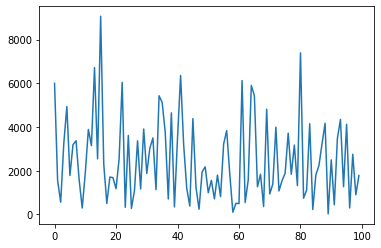

In [182]:
fig, ax = plt.subplots(1, 1)
ax.plot(list(range(0,100)), dist_instantRides.rvs(100))

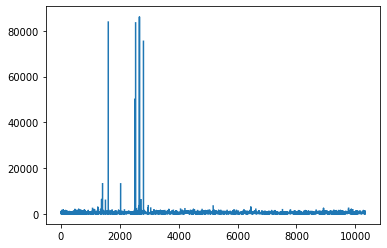

In [183]:
fig, ax = plt.subplots(1, 1)
ax.plot(list(range(0,len(df))), df['pickup_arrival_time'])

In [179]:
dist_instantRides.rvs(10)

array([ 723.891491  , 6478.3725246 ,  906.0673899 , 2015.07516971,
       1369.03254507, 3684.39166364, 2494.25566407, 2010.74108718,
       3273.4892591 , 1728.54659562])

In [166]:
newRides['pickup_arrival_time'].mean()

3311.76

In [167]:
df['pickup_arrival_time'].mean()

583.8233143785541

In [161]:
newRides[['created_at', 'scheduled_to', 'vehicle_arrived_at']]

,created_at,scheduled_to,vehicle_arrived_at
0,2022-06-02 07:30:20,2022-06-02 07:30:20,2022-06-02 07:32:20
1,2022-06-02 22:38:28,2022-06-02 22:38:28,2022-06-02 22:40:28
2,2022-06-03 23:34:18,2022-06-03 23:34:18,2022-06-03 23:36:18
3,2022-06-03 22:47:43,2022-06-04 21:50:00,2022-06-04 21:53:00
4,2022-06-05 12:27:13,2022-06-05 12:27:13,2022-06-05 12:29:13
5,2022-06-05 16:08:10,2022-06-05 16:08:10,2022-06-05 16:10:10
6,2022-06-06 16:31:25,2022-06-06 23:55:00,2022-06-06 23:58:00
7,2022-06-07 16:17:10,2022-06-07 23:45:00,2022-06-07 23:48:00
8,2022-06-07 15:09:30,2022-06-08 00:50:00,2022-06-08 00:53:00
9,2022-06-07 15:24:38,2022-06-07 15:24:38,2022-06-07 15:26:38
